In [8]:
import torch
from torch import nn
from d2l import torch as d2l


def dropout_layer(X, dropout):
    assert 0 <= dropout <= 1
    # 在本情况中，所有元素都被丢弃
    if dropout == 1:
        return torch.zeros_like(X)
    # 在本情况中，所有元素都被保留
    if dropout == 0:
        return X
    mask = (torch.rand(X.shape) > dropout).float()
    return mask * X / (1.0 - dropout)

In [9]:
X= torch.arange(16, dtype = torch.float32).reshape((2, 8))
print(X)
print(dropout_layer(X, 0.))
print(dropout_layer(X, 0.5))
print(dropout_layer(X, 1.))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])
tensor([[ 0.,  2.,  0.,  6.,  8., 10., 12.,  0.],
        [16.,  0.,  0., 22., 24.,  0.,  0.,  0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])


In [10]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

In [11]:
dropout1, dropout2 = 0.2, 0.5

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2,
                 is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.training = is_training
        self.lin1 = nn.Linear(num_inputs, num_hiddens1)
        self.lin2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.lin3 = nn.Linear(num_hiddens2, num_outputs)
        self.relu = nn.ReLU()

    def forward(self, X):
        H1 = self.relu(self.lin1(X.reshape((-1, self.num_inputs))))
        # 只有在训练模型时才使用dropout
        if self.training == True:
            # 在第一个全连接层之后添加一个dropout层
            H1 = dropout_layer(H1, dropout1)
        H2 = self.relu(self.lin2(H1))
        if self.training == True:
            # 在第二个全连接层之后添加一个dropout层
            H2 = dropout_layer(H2, dropout2)
        out = self.lin3(H2)
        return out


net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

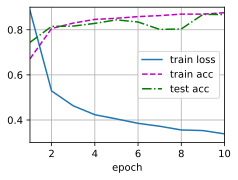

In [12]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

w的L2范数是： 12.223597526550293


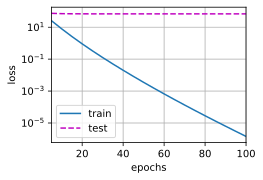

In [6]:
net = nn.Sequential(nn.Flatten(),
        nn.Linear(784, 256),
        nn.ReLU(),
        # 在第一个全连接层之后添加一个dropout层
        nn.Dropout(dropout1),
        nn.Linear(256, 256),
        nn.ReLU(),
        # 在第二个全连接层之后添加一个dropout层
        nn.Dropout(dropout2),
        nn.Linear(256, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights)

trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

w的L2范数是： 0.3731693923473358


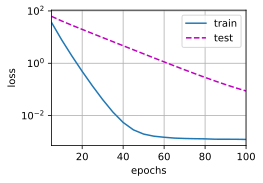

In [7]:
train(3)

tensor([0.0003, 0.0004, 0.0004, 0.0005, 0.0005, 0.0006, 0.0006, 0.0007, 0.0007,
        0.0008, 0.0009, 0.0010, 0.0011, 0.0012, 0.0014, 0.0015, 0.0017, 0.0018,
        0.0020, 0.0022, 0.0025, 0.0027, 0.0030, 0.0033, 0.0037, 0.0041, 0.0045,
        0.0049, 0.0055, 0.0060, 0.0066, 0.0073, 0.0081, 0.0089, 0.0099, 0.0109,
        0.0120, 0.0132, 0.0146, 0.0160, 0.0177, 0.0194, 0.0214, 0.0235, 0.0259,
        0.0285, 0.0313, 0.0343, 0.0376, 0.0412, 0.0452, 0.0494, 0.0540, 0.0590,
        0.0644, 0.0701, 0.0763, 0.0828, 0.0898, 0.0972, 0.1050, 0.1132, 0.1217,
        0.1306, 0.1398, 0.1491, 0.1587, 0.1683, 0.1779, 0.1874, 0.1966, 0.2055,
        0.2139, 0.2217, 0.2288, 0.2350, 0.2403, 0.2445, 0.2475, 0.2494, 0.2500,
        0.2494, 0.2475, 0.2445, 0.2403, 0.2350, 0.2288, 0.2217, 0.2139, 0.2055,
        0.1966, 0.1874, 0.1779, 0.1683, 0.1587, 0.1491, 0.1398, 0.1306, 0.1217,
        0.1132, 0.1050, 0.0972, 0.0898, 0.0828, 0.0763, 0.0701, 0.0644, 0.0590,
        0.0540, 0.0494, 0.0452, 0.0412, 

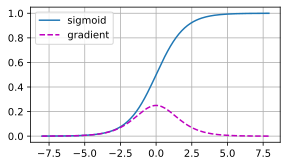

In [18]:
%matplotlib inline
import torch
from d2l import torch as d2l

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
y.backward(gradient=torch.ones_like(x))

print(x.grad)
d2l.plot(x.detach().numpy(), [y.detach().numpy(), x.grad.numpy()],
         legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))